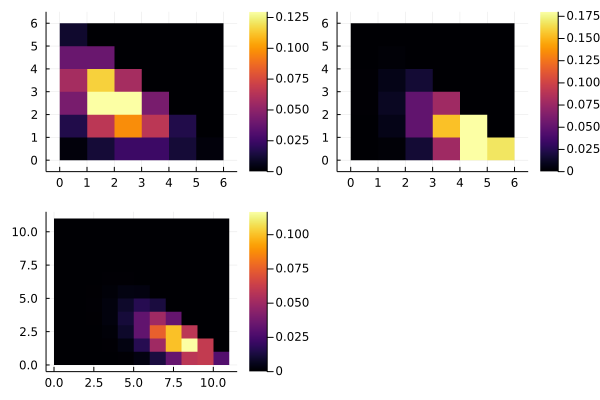

In [47]:
### ベイズ推論による機械学習 2.2.3節 多項分布の実装

## 多項分布 

# K: 次元数, M: 試行回数
# mₖ ∈ {0,1,...,M}, Σmₖ=M for k=1,...,K 
# πₖ ∈ (0,1), Σπₖ=1 for k=1,...,K

function Mult(mₖ, 𝛑, M)
    p = factorial(M)
    for i in 1:length(mₖ)
        p *= 𝛑[i]^mₖ[i] / factorial(mₖ[i])
    end
    p
end

## 確率計算
function prob(𝛑, M)
    matrix = zeros(M+1, M+1)
    for m₁ in 0:M
        for m₂ in 0:(M-m₁)
            m₃ = M - (m₁+m₂)
            if m₃ >= 0
                p = Mult([m₁,m₂,m₃], 𝛑, M)
                matrix[m₁+1, m₂+1] = p
            end
        end
    end
    matrix
end

# M=5, 𝛑=[0.4, 0.3, 0.3]の場合
M1 = 5
𝛑1 = [0.4, 0.3, 0.3]
p1 = prob(𝛑1, M1)

# M=5, 𝛑=[0.15, 0.7, 0.15]の場合
M2 = 5
𝛑2 = [0.15, 0.7, 0.15]
p2 = prob(𝛑2, M2)

# M=10, 𝛑=[0.15, 0.7, 0.15]の場合
M3 = 10
𝛑3 = [0.15, 0.7, 0.15]
p3 = prob(𝛑3, M3)

# 作図
using Plots

plot(heatmap(0:1:6, 0:1:6, p1),
    heatmap(0:1:6, 0:1:6, p2),
    heatmap(0:1:11, 0:1:11, p3))